
### Installing the requirements


In [ ]:
pip install idx2numpy

### Importing the Required Packages

In [ ]:
import idx2numpy
import numpy as np
from matplotlib import pyplot 
import cv2

### Loading the Dataset

Source:-<a href='url'>https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python </a>

In [ ]:
def load_dataset(file_path_img,file_path_label):
  X=idx2numpy.convert_from_file(file_path_img)
  y=idx2numpy.convert_from_file(file_path_label)
  return X,y

In [ ]:
train_img_path="/content/drive/MyDrive/task2/train-images.idx3-ubyte"
train_label_path="/content/drive/MyDrive/task2/train-labels.idx1-ubyte"

In [ ]:
X,y=load_dataset(train_img_path,train_label_path)

In [ ]:
print(len(X),len(y))

60000 60000


In [ ]:
X.shape

(60000, 28, 28)

<ul>
<li>Visualising the train images.</li>
</ul>

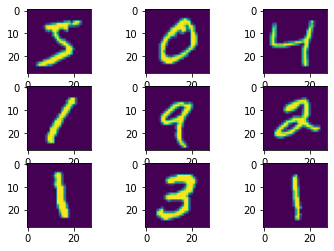

In [ ]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X[i].reshape(28,28))

### Preprocessing the images.
<ul>
<li>The function img_preprocess preprocesses our image.</li>
<li>It converts the image into grayscale and resizes it to (32,32) and normalises the pixel values.</li>
</ul>

<ul><li>Importing the req. packages. </li>
</ul>

In [ ]:
from keras.preprocessing import image
from keras.utils import to_categorical

In [ ]:
def img_preprocess(img_vector):
  x_final=[]
  for i in range(0,len(img_vector)):
    img = img_vector[i]
    res = cv2.resize(img, dsize=(32, 32))
    data = image.img_to_array(res)
    x_final.append(data/255.0)
  return np.array(x_final)

<li>Calling the img_preprocess function.</li>





In [ ]:
X_final=img_preprocess(X)

In [ ]:
X_final.shape

(60000, 32, 32, 1)

In [ ]:
y = np.array(y)
y.shape

(60000,)

<li>Converting the labels into categorical array.</li>

In [ ]:
y = to_categorical(y,num_classes=10, dtype = 'int')

In [ ]:
y.shape

(60000, 10)

### Splitting the dataset into train and cross validation set.

I splitted the train set into cross val set to keep a track of underfit,overfit and bestfit of the model.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val= train_test_split(X_final, y, test_size=0.2, random_state=0)

### Training the pretrained model.

<ul>
<li>Importing packages</li>
</ul>

In [ ]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.layers import Conv2D,MaxPooling2D, AveragePooling2D , BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from keras.regularizers import L2
from keras.callbacks import  ModelCheckpoint

In [ ]:
prev_model=load_model("/content/drive/MyDrive/Saved_Material_task2_part 1/Model.epoch09.hdf5")

<li>Popping the last layer as the dataset contains 10 classes.</li>

In [ ]:
prev_model.pop()

In [ ]:
prev_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_40 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
batch_normalization_41 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 4, 4, 64)        

<li>Adding a softmax layer for 10 classes.</li>

In [ ]:
pretrain_model=Sequential()
pretrain_model.add(prev_model)
pretrain_model.add(Dense(10,activation='softmax'))

In [ ]:
pretrain_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
pretrain_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_19 (Sequential)   (None, 64)                70240     
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 70,890
Trainable params: 70,634
Non-trainable params: 256
_________________________________________________________________


<li>Setting path to save model checkpoints.</li>

In [ ]:
model_path='Pretrained_Model.epoch{epoch:02d}.hdf5'
checkpoint= ModelCheckpoint(filepath='/content/drive/MyDrive/Saved_material_task2_part 2/'+model_path,verbose=1)

<li>Training on the training dataset. I chose batch_size=256 because there were 48,000 images in training dataset. Hence to ensure every class was present in every batch.</li>

In [ ]:
history=pretrain_model.fit(X_train,y_train,batch_size=256,validation_data=(X_val,y_val),epochs=10,callbacks=checkpoint)

Epoch 1/10
188/188 [==============================] - 57s 296ms/step - loss: 0.7050 - accuracy: 0.8284 - val_loss: 0.1723 - val_accuracy: 0.9469

Epoch 00001: saving model to /content/drive/MyDrive/Saved_material_task2_part 2/Pretrained_Model.epoch01.hdf5
Epoch 2/10
188/188 [==============================] - 55s 293ms/step - loss: 0.0457 - accuracy: 0.9869 - val_loss: 0.0946 - val_accuracy: 0.9716

Epoch 00002: saving model to /content/drive/MyDrive/Saved_material_task2_part 2/Pretrained_Model.epoch02.hdf5
Epoch 3/10
188/188 [==============================] - 55s 294ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.0391 - val_accuracy: 0.9883

Epoch 00003: saving model to /content/drive/MyDrive/Saved_material_task2_part 2/Pretrained_Model.epoch03.hdf5
Epoch 4/10
188/188 [==============================] - 55s 294ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0479 - val_accuracy: 0.9843

Epoch 00004: saving model to /content/drive/MyDrive/Saved_material_task2_part 2/Pretra

<ul>
<li>Plot of accuracy. </li>
</ul>

**Note:- By mistake i have written the title of plot as Training and validation Loss and the ylabel as Loss. I have actually plotted the accuracy curve only. The title must have been Training and validation accuray and the ylabel as Accuracy and the labels as well must have been train accuracy for red line and validation accuracy for yellow line.I deeply apologize for my mistake.** 

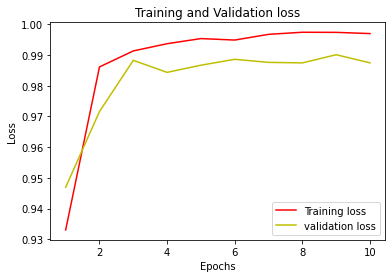

In [ ]:
epochs = range(1,11)
pyplot.plot(epochs, history.history['accuracy'], 'r', label='Training loss')
pyplot.plot(epochs, history.history['val_accuracy'], 'y', label='validation loss')
pyplot.title('Training and Validation Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

<ul>
<li> Plot of loss function. </li>
</ul>

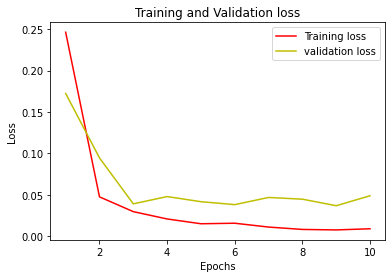

In [ ]:
epochs = range(1,11)
pyplot.plot(epochs, history.history['loss'], 'r', label='Training loss')
pyplot.plot(epochs, history.history['val_loss'], 'y', label='validation loss')
pyplot.title('Training and Validation loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

### Training the Untrained Model

In [ ]:
untrained_model=Sequential()
untrained_model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))
untrained_model.add(BatchNormalization())
untrained_model.add(MaxPooling2D(2,2))
untrained_model.add(Conv2D(32,(3,3),activation='relu'))
untrained_model.add(BatchNormalization())
untrained_model.add(MaxPooling2D(2,2))
untrained_model.add(Conv2D(64,(3,3),activation='relu'))
untrained_model.add(BatchNormalization())
untrained_model.add(MaxPooling2D(2,2))
untrained_model.add(Flatten())
untrained_model.add(Dense(128,activation='relu'))
untrained_model.add(Dense(64,activation='relu'))
untrained_model.add(Dense(10,activation='softmax'))

In [ ]:
untrained_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
untrained_model_path='Untrained_Model.epoch{epoch:02d}.hdf5'
checkpoint_2= ModelCheckpoint(filepath='/content/drive/MyDrive/Saved_material_task2_part 2/'+untrained_model_path,verbose=1)

In [ ]:
history=untrained_model.fit(X_train,y_train,batch_size=256,validation_data=(X_val,y_val),epochs=10,callbacks=checkpoint_2)

Epoch 1/10
188/188 [==============================] - 56s 294ms/step - loss: 0.5422 - accuracy: 0.8455 - val_loss: 2.0318 - val_accuracy: 0.4285

Epoch 00001: saving model to /content/drive/MyDrive/Saved_material_task2_part 2/Untrained_Model.epoch01.hdf5
Epoch 2/10
188/188 [==============================] - 55s 292ms/step - loss: 0.0462 - accuracy: 0.9857 - val_loss: 0.6350 - val_accuracy: 0.8339

Epoch 00002: saving model to /content/drive/MyDrive/Saved_material_task2_part 2/Untrained_Model.epoch02.hdf5
Epoch 3/10
188/188 [==============================] - 55s 292ms/step - loss: 0.0306 - accuracy: 0.9909 - val_loss: 0.0854 - val_accuracy: 0.9737

Epoch 00003: saving model to /content/drive/MyDrive/Saved_material_task2_part 2/Untrained_Model.epoch03.hdf5
Epoch 4/10
188/188 [==============================] - 55s 292ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0440 - val_accuracy: 0.9869

Epoch 00004: saving model to /content/drive/MyDrive/Saved_material_task2_part 2/Untrained

<ul>
<li> Plot of loss function. </li>
</ul>

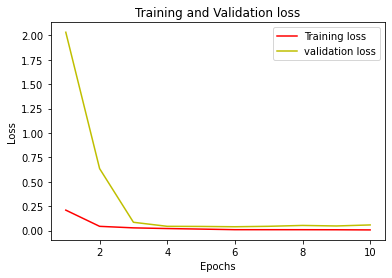

In [ ]:
epochs = range(1,11)
pyplot.plot(epochs, history.history['loss'], 'r', label='Training loss')
pyplot.plot(epochs, history.history['val_loss'], 'y', label='validation loss')
pyplot.title('Training and Validation loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

<ul>
<li>Plot of accuracy. </li>
</ul>

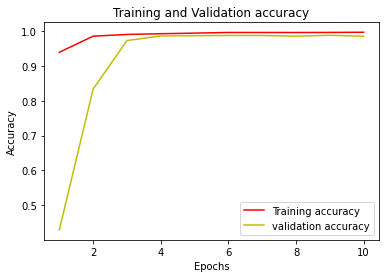

In [ ]:
epochs = range(1,11)
pyplot.plot(epochs, history.history['accuracy'], 'r', label='Training accuracy')
pyplot.plot(epochs, history.history['val_accuracy'], 'y', label='validation accuracy')
pyplot.title('Training and Validation accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

### Loading the test data

In [ ]:
test_img_path='/content/drive/MyDrive/task2/t10k-images.idx3-ubyte'
test_label_path='/content/drive/MyDrive/task2/t10k-labels.idx1-ubyte'
X_test,y_test=load_dataset(test_img_path,test_label_path)

In [ ]:
print(X_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


### Preprocessing the test data.

In [ ]:
X_final_test=img_preprocess(X_test)

In [ ]:
X_final_test.shape

(10000, 32, 32, 1)

<ul>
<li>Converting the labels into categorical array.</li>
</ul>

In [ ]:
y_test = to_categorical(y_test,num_classes=10, dtype = 'int')

### Evaluating the pretrained Model.

<ul>
<li>Evaluating on last epoch.</li>
</ul>

In [ ]:
pretrain_model.evaluate(X_final_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0417 - accuracy: 0.9901


[0.04167608916759491, 0.9901000261306763]

<li>Storing the predictions of the model </li>

In [ ]:
y_pred_label=pretrain_model.predict(X_final_test)

In [ ]:
y_pred_label.shape

(10000, 10)

In [ ]:
y_pred_categorical=np.zeros((10000,10))

### Creating a cateogrical vector which contains 0's and it would contain 1 corresponding to the predicted class.

In [ ]:
for i in range(0,len(y_pred_label)):
  idx=np.argmax(y_pred_label[i])
  for j in range(0,len(y_pred_label[i])):
    if j==idx:
      y_pred_categorical[i][j]=1
    else:
       y_pred_categorical[i][j]=0

In [ ]:
y_pred_categorical=y_pred_categorical.astype(int)

In [ ]:
y_pred_categorical.shape

(10000, 10)

<ul>
<li>Calculating the precision_score</li>
</ul>

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_pred_categorical,y_test,average='macro'))

0.9899755106583263


<ul>
<li>Calculating the recall_score</li>
</ul>

In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_pred_categorical,y_test,average='macro'))

0.9902150265694909


### Evaluating the untrained Model.

<ul>
<li>Evaluating on last epoch.</li>
</ul>

In [ ]:
untrained_model.evaluate(X_final_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0522 - accuracy: 0.9864


[0.05224138870835304, 0.9864000082015991]

<li>Storing the predictions of the model </li>

In [ ]:
y_pred_untrain=untrained_model.predict(X_final_test)

In [ ]:
y_categorical=np.zeros((10000,10))

### Creating a cateogrical vector which contains 0's and it would contain 1 corresponding to the predicted class.

In [ ]:
for i in range(0,len(y_pred_untrain)):
  idx=np.argmax(y_pred_untrain[i])
  for j in range(0,len(y_pred_untrain[i])):
    if j==idx:
      y_categorical[i][j]=1
    else:
       y_categorical[i][j]=0

In [ ]:
y_categorical=y_categorical.astype(int)

<ul>
<li>Calculating the precision_score</li>
</ul>

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_categorical,y_test,average='macro'))

0.987295072657238


<ul>
<li>Calculating the recall_score</li>
</ul>

In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_categorical,y_test,average='macro'))

0.9875369910319683


<ul>
I chose average ='macro' in the recall_score and precision_score because
<li>It calculates metrics for each label and finds their unweighted mean and it does not take class imbalance into account.</li>
</ul>

<table style="width:100%">
  <tr>
    <th>Parameter</th>
    <th>Pretrained Model</th> 
    <th>Untrained Model/Randomly intialised model</th>
  </tr>
  <tr>
    <td>Precision Score</td>
    <td>98.997 %</td>
    <td>98.729 %</td>
  </tr>
  <tr>
    <td>Recall Score</td>
    <td>99.021 %</td>
    <td>98.753 %</td>
  </tr>
  <tr>
    <td>Convergence Time</td>
    <td>As pretraining a model is also known as Transfer Learning. <br> 
    So the pretrained model converges faster as compared to the <br>
    randomly intialised model because the pretrain model was already <br>
    diversified as it was trained on other dataset as well which also <br>
    contained numbers in addition to alphabets.Hence the weights were tuned<br> for predicting numbers .So the model was able <br>
    to learn faster and hence it was able to converge faster.</td>
    <td>The randomly intialised model on the other hand was intialised <br>
        with random weights hence it first had to tune it's weight for<br>
         the data and hence it took longer time to converge. <br>
     </td>
    </tr>
    <tr>
<td> Accuracy </td>
<td> 99.01 %</td>
<td> 98.64 %</td>
  </tr>
</table>